In [8]:
import numpy as np
import pandas as pd
from objects.data_manipulation.normalizer import Normalizer
from objects.data_manipulation.statistics import Statistics
from utils.helpers.pandas_helpers import keep_levels, index_slice
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
investment_universe = [
    'ADA/USDC:USDC',
    'DOT/USDC:USDC',
    'SOL/USDC:USDC',
    'XRP/USDC:USDC',
    'BTC/USDC:USDC',
    'LINK/USDC:USDC',
    'ETH/USDC:USDC']

In [15]:
prices_df = pd.read_parquet('/Users/educontreras/PycharmProjects/crypto_signals/objects/retriever/daily_prices.parquet')
prices_df.columns = prices_df.columns.rename("field", level=0)
close_df = keep_levels(index_slice(prices_df, field = 'close'), ['symbol'])
close_df = close_df.loc[:, investment_universe]
returns_df = Normalizer.log_returns(close_df, [3])

2024-12-27 13:35:18.243 | INFO     | objects.data_manipulation.normalizer:log_returns:66 - Starting log returns computation
2024-12-27 13:35:18.243 | INFO     | objects.data_manipulation.normalizer:log_returns:70 - Computing log returns for window size 3
2024-12-27 13:35:18.264 | SUCCESS  | objects.data_manipulation.normalizer:log_returns:91 - Log returns computation completed


In [21]:
autocorrelation_df = Statistics.autocorrelation(
    returns_df,asset_level='symbol',
        returns_window_level='period',
        windows=[10, 20, 30, 60, 90],
        autocorr_window_level='autocorr_window')

2024-12-27 13:37:04.270 | INFO     | objects.data_manipulation.statistics:autocorrelation:27 - Starting autocorrelation computation
2024-12-27 13:37:04.270 | INFO     | objects.data_manipulation.statistics:autocorrelation:31 - Computing autocorrelation for window size 10
2024-12-27 13:37:05.569 | INFO     | objects.data_manipulation.statistics:autocorrelation:31 - Computing autocorrelation for window size 20
2024-12-27 13:37:06.650 | INFO     | objects.data_manipulation.statistics:autocorrelation:31 - Computing autocorrelation for window size 30
2024-12-27 13:37:07.723 | INFO     | objects.data_manipulation.statistics:autocorrelation:31 - Computing autocorrelation for window size 60
2024-12-27 13:37:08.732 | INFO     | objects.data_manipulation.statistics:autocorrelation:31 - Computing autocorrelation for window size 90
2024-12-27 13:37:09.839 | SUCCESS  | objects.data_manipulation.statistics:autocorrelation:66 - Autocorrelation computation completed


<Axes: xlabel='timestamp'>

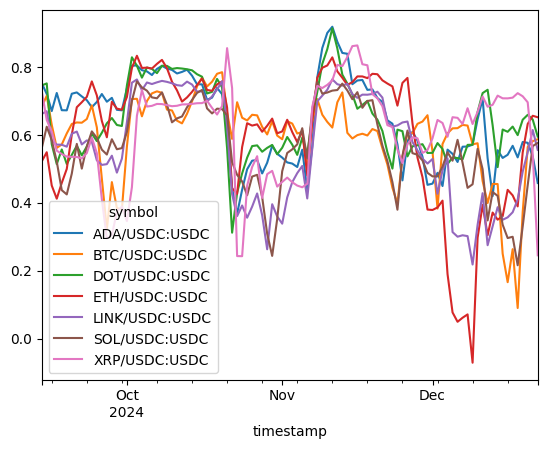

In [25]:
keep_levels(index_slice(autocorrelation_df, autocorr_window = 20), ['symbol']).tail(100).plot()

In [28]:
# Lista de ventanas para las que queremos los últimos valores
autocorr_windows = [10, 20, 30]

# Lista donde almacenaremos los resultados para cada ventana
last_values = []

for window in autocorr_windows:

    # Filtrar el DataFrame por la ventana actual
    window_df = keep_levels(index_slice(autocorrelation_df, autocorr_window = window), ['symbol'])

    # Obtener el último valor para cada símbolo (último índice temporal)
    last_value = window_df.iloc[-1].rename(window)  # Renombrar la serie con el nombre del window
    last_values.append(last_value)

# Combinar los resultados en un único DataFrame
result_table = pd.concat(last_values, axis=1)

# Asegurar que las columnas estén etiquetadas con las ventanas
result_table.columns = autocorr_windows
result_table

,10,20,30
symbol,,,
ADA/USDC:USDC,0.446664,0.458551,0.590759
BTC/USDC:USDC,0.660124,0.587609,0.557071
DOT/USDC:USDC,0.471251,0.595335,0.747371
ETH/USDC:USDC,0.733899,0.652395,0.595126
LINK/USDC:USDC,0.848949,0.556134,0.580440
SOL/USDC:USDC,0.553618,0.576649,0.507423
XRP/USDC:USDC,0.542537,0.245511,0.709682
